In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
# csv파일 데이터로 불러오기

df = pd.read_csv("C://Users//82104//Desktop//Ai프로젝트//Medicalpremium.csv")
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [39]:
# 데이터 특성 간 상관관계 계수 분석

df.corr()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


In [40]:
# 상관관계 높은 것끼리 데이터 합성

df['synthesis_1'] = df['AnyTransplants'] * df['AnyChronicDiseases']
df['synthesis_2'] = df['AnyTransplants'] * df['NumberOfMajorSurgeries']
df['synthesis_3'] = df['NumberOfMajorSurgeries'] * df['AnyChronicDiseases']
df['synthesis_4'] = df['AnyTransplants'] + df['AnyChronicDiseases'] + df['NumberOfMajorSurgeries']
df['synthesis_5'] = df['BloodPressureProblems'] + df['NumberOfMajorSurgeries']

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
 11  synthesis_1              986 non-null    int64
 12  synthesis_2              986 non-null    int64
 13  synthesis_3              986 non-null    int64
 14  synthesis_4              986 non-null    int64
 15  synthe

In [42]:
# 데이터 특성의 평균, 표준편차, 최대, 최소 분석

df[['Age', 'Height', 'Weight', 'PremiumPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
PremiumPrice,986.0,24336.713996,6248.184382,15000.0,21000.0,23000.0,28000.0,40000.0


C:\Users\82104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


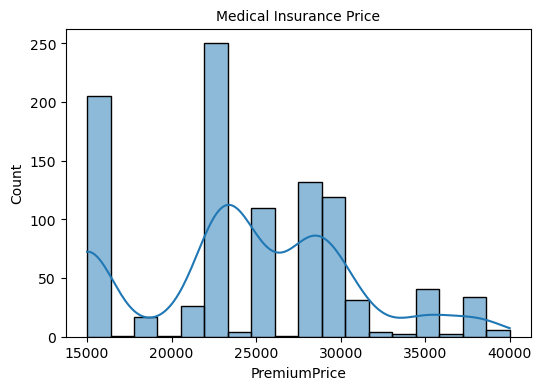

In [43]:
# 의료보험비용 분포 나타내는 히스토그램

plt.figure(figsize=(6,4))
sns.histplot(df['PremiumPrice'], kde=True)
plt.title('Medical Insurance Price', fontsize=10)
plt.show()

<Axes: >

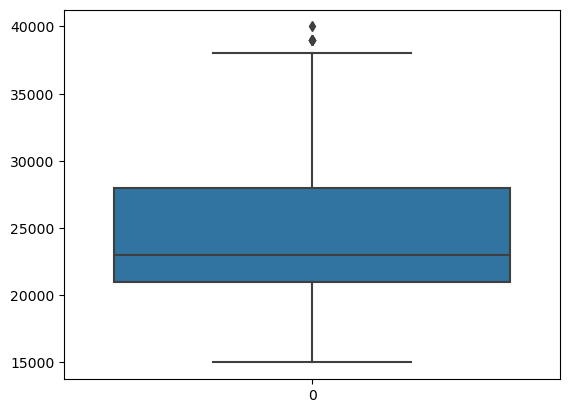

In [44]:
# 의료보험비용 boxplot 그리기

sns.boxplot(df['PremiumPrice'])

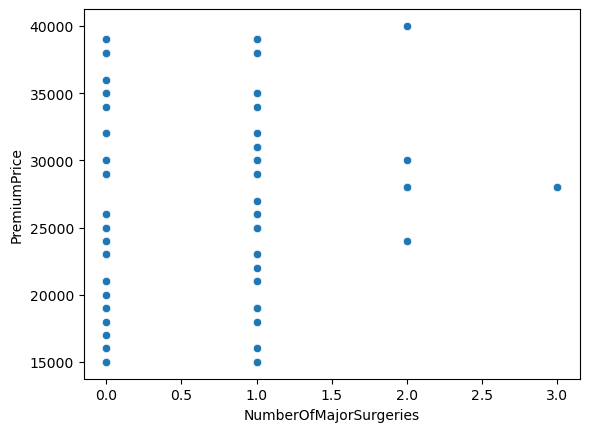

In [10]:
sns.scatterplot(y='PremiumPrice',x='NumberOfMajorSurgeries',data=df)
plt.show()

<Axes: xlabel='Weight', ylabel='PremiumPrice'>

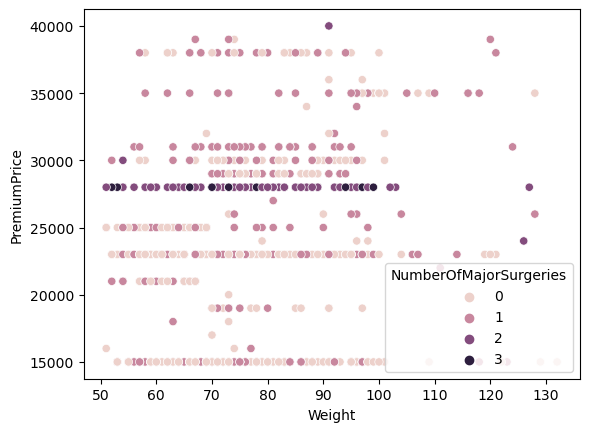

In [52]:
sns.scatterplot(x = 'Weight', y = 'PremiumPrice', hue = 'NumberOfMajorSurgeries', data = df)

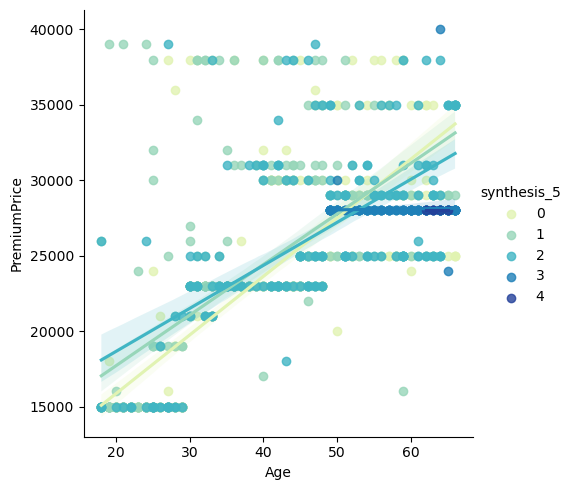

In [9]:
sns.lmplot(x="Age", y="PremiumPrice", hue="synthesis_5", data=df, palette = 'YlGnBu')

C:\Users\82104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\82104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\82104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\82104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

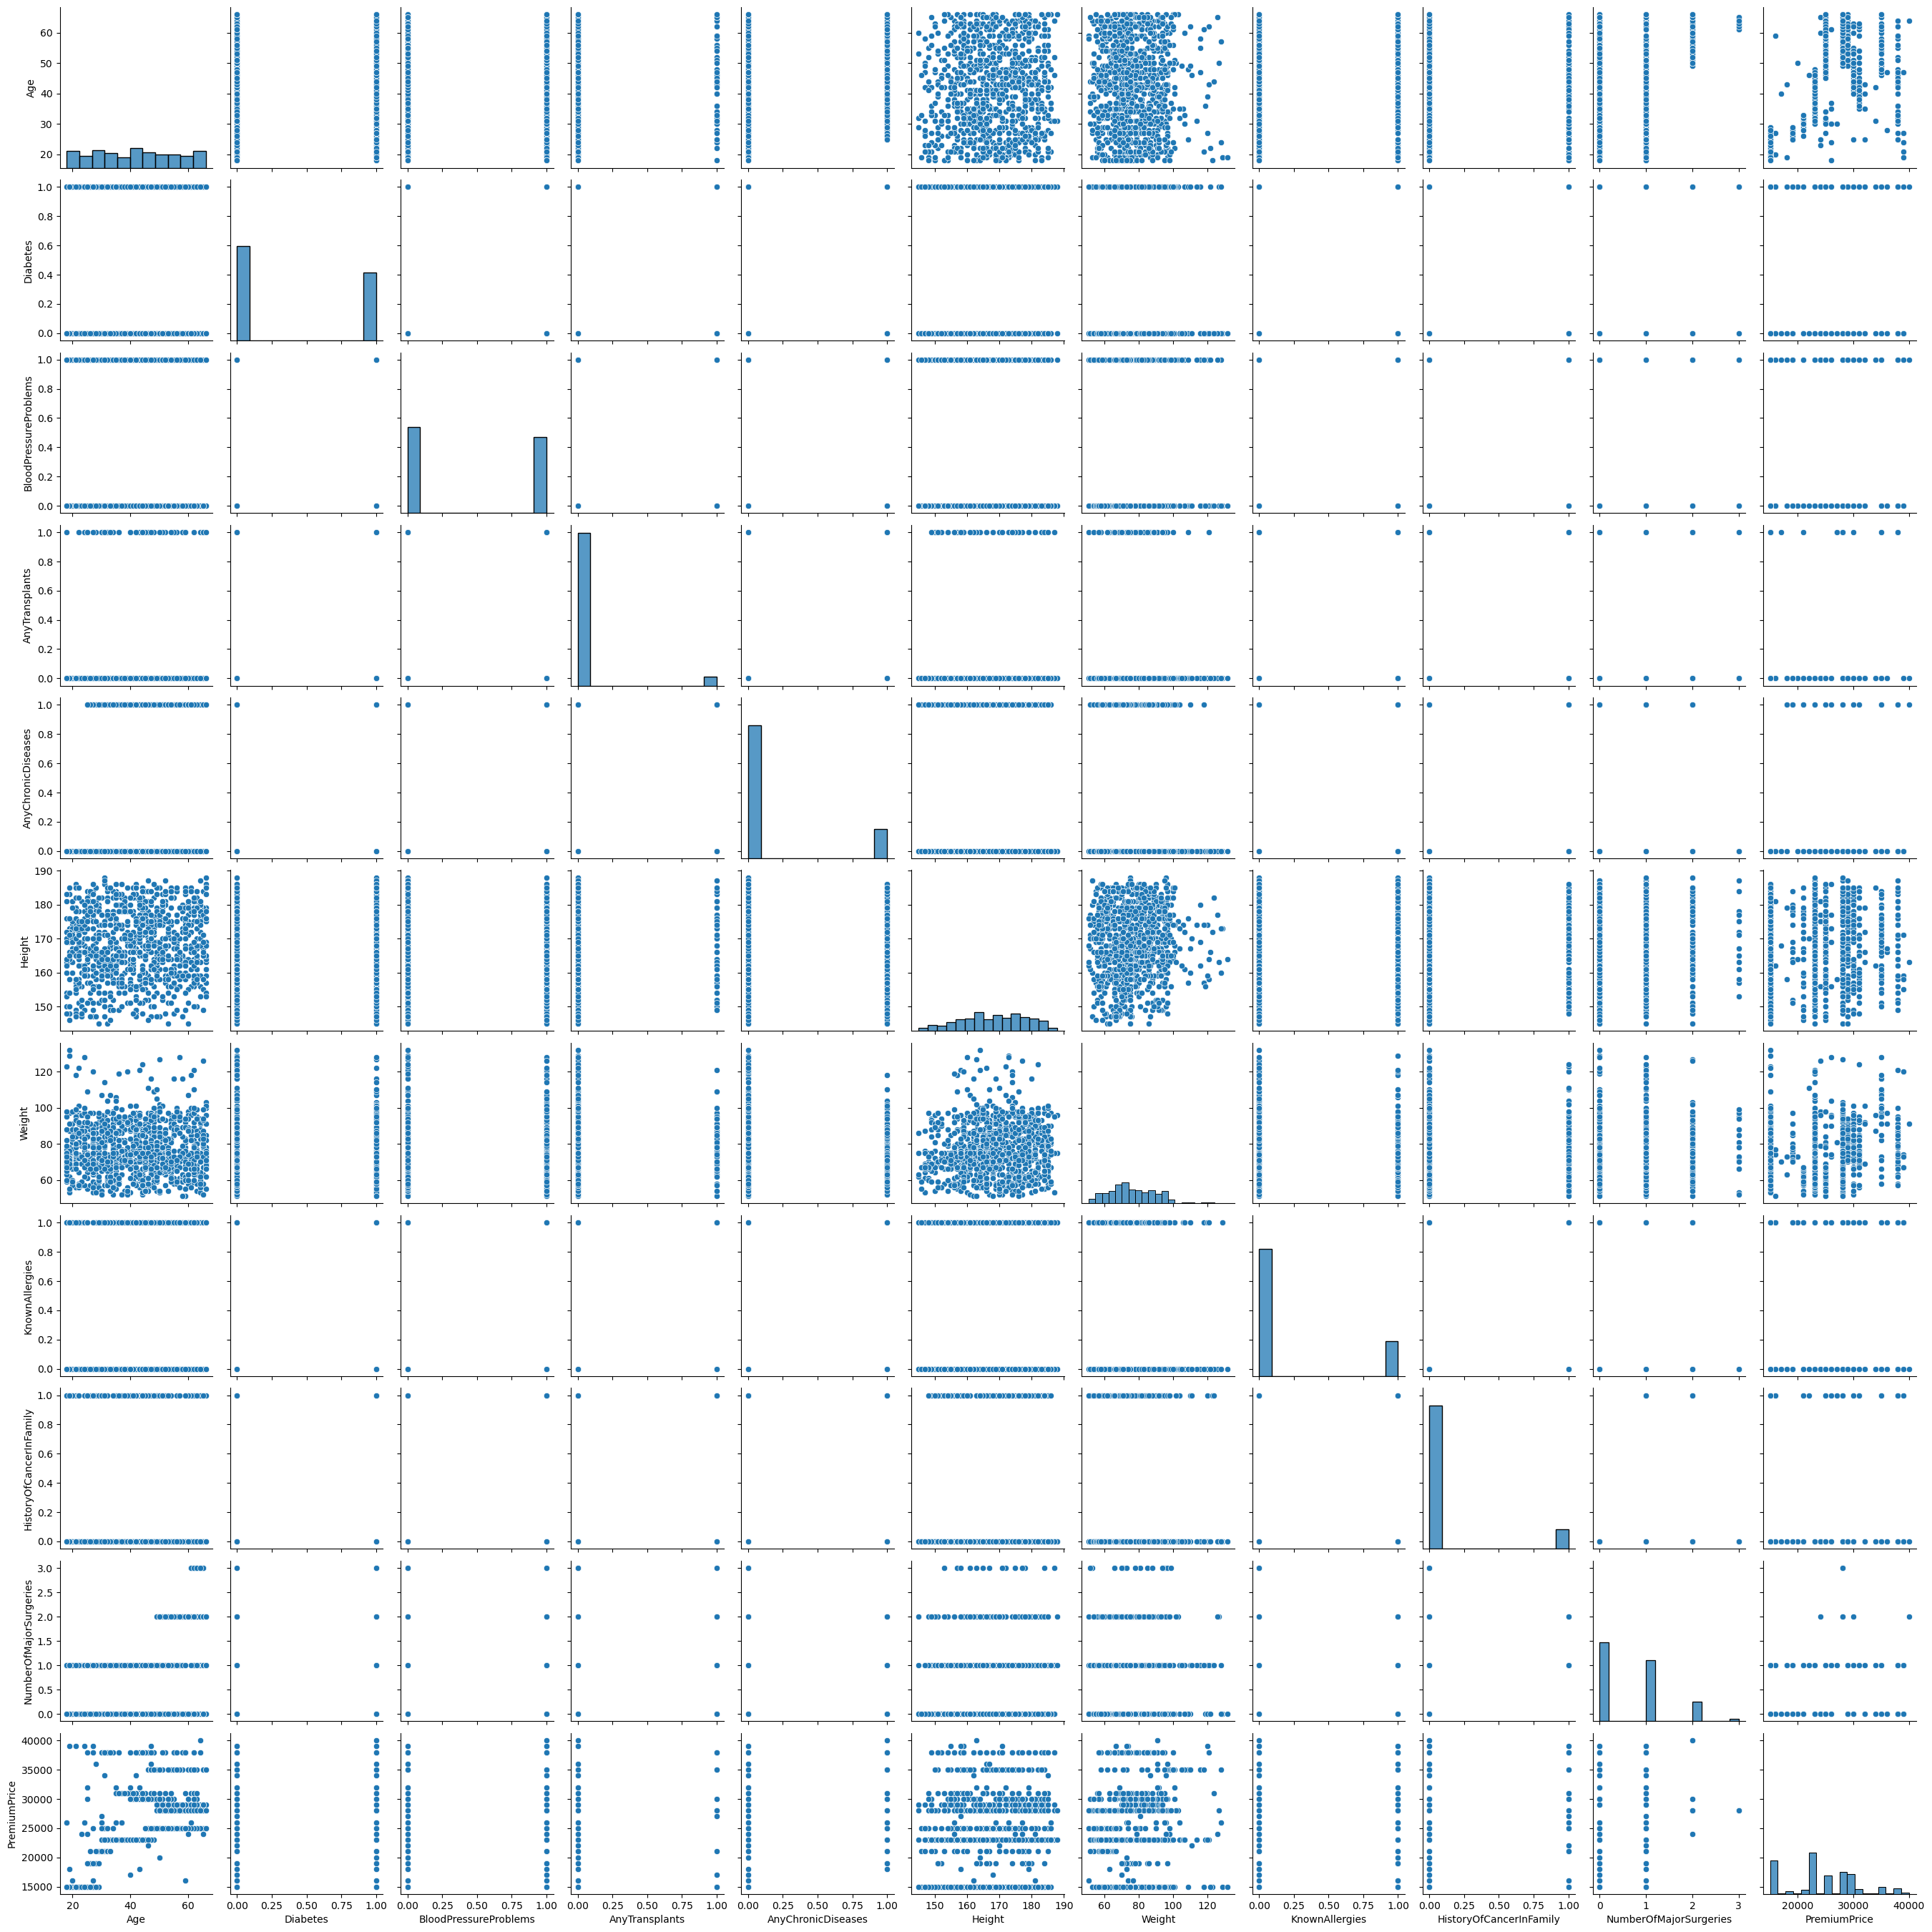

In [12]:
df = pd.read_csv("C://Users//82104//Desktop//Ai프로젝트//Medicalpremium.csv").replace([np.inf, -np.inf], np.nan)
sns.pairplot(df)

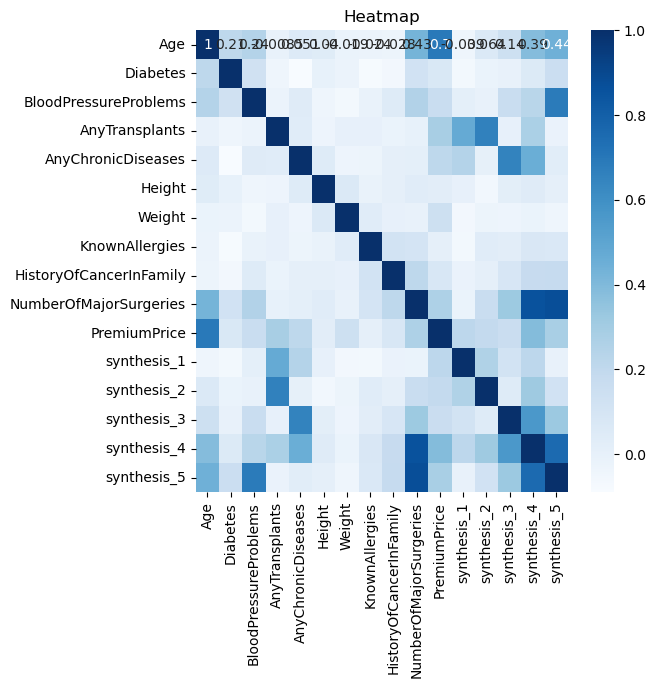

In [18]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True, cmap='Blues')
plt.title("Heatmap")
plt.show()